In [1]:
from sage.all import *
import numpy as np
import Wigner as wg

import matplotlib.pyplot as plt

In [2]:
mubs = np.load('MUBS/3-3-desarguesian.npy')
mubs_kantor = np.load('MUBS/3-3-albert.npy')

In [4]:
F = GF(3**3, 'a'); a = F.gen()
F

Finite Field in a of size 3^3

In [5]:
F = [F(0)] + [a**j for j in range(26)]
F

[0,
 1,
 a,
 a^2,
 a + 2,
 a^2 + 2*a,
 2*a^2 + a + 2,
 a^2 + a + 1,
 a^2 + 2*a + 2,
 2*a^2 + 2,
 a + 1,
 a^2 + a,
 a^2 + a + 2,
 a^2 + 2,
 2,
 2*a,
 2*a^2,
 2*a + 1,
 2*a^2 + a,
 a^2 + 2*a + 1,
 2*a^2 + 2*a + 2,
 2*a^2 + a + 1,
 a^2 + 1,
 2*a + 2,
 2*a^2 + 2*a,
 2*a^2 + 2*a + 1,
 2*a^2 + 1]

In [27]:
wootters = wg.Wigner(F, mubs)
kantor   = wg.Wigner(F, mubs_kantor, op='albert')

In [28]:
raysW = wootters.Spread()
raysK = kantor.Spread()

In [29]:
def SymplecticForm(alpha, beta):
    a, b = alpha
    c, d = beta
    return (a*d - b*c).trace()

In [30]:
def checkSpread(lines):
    for k in range(len(lines)):
        for alpha in lines[k]:
            for beta in lines[k]:
                s = SymplecticForm(alpha, beta)
                if s != 0:
                    print('Not totally isotropic!')
                    print(alpha, beta)
                    print(s)
                    break
        print('Ray {} is totally isotropic!'.format(k))

In [31]:
checkSpread(raysW)

Ray 0 is totally isotropic!
Ray 1 is totally isotropic!
Ray 2 is totally isotropic!
Ray 3 is totally isotropic!
Ray 4 is totally isotropic!
Ray 5 is totally isotropic!
Ray 6 is totally isotropic!
Ray 7 is totally isotropic!
Ray 8 is totally isotropic!
Ray 9 is totally isotropic!
Ray 10 is totally isotropic!
Ray 11 is totally isotropic!
Ray 12 is totally isotropic!
Ray 13 is totally isotropic!
Ray 14 is totally isotropic!
Ray 15 is totally isotropic!
Ray 16 is totally isotropic!
Ray 17 is totally isotropic!
Ray 18 is totally isotropic!
Ray 19 is totally isotropic!
Ray 20 is totally isotropic!
Ray 21 is totally isotropic!
Ray 22 is totally isotropic!
Ray 23 is totally isotropic!
Ray 24 is totally isotropic!
Ray 25 is totally isotropic!
Ray 26 is totally isotropic!
Ray 27 is totally isotropic!


In [32]:
checkSpread(raysK)

Ray 0 is totally isotropic!
Ray 1 is totally isotropic!
Ray 2 is totally isotropic!
Ray 3 is totally isotropic!
Ray 4 is totally isotropic!
Ray 5 is totally isotropic!
Ray 6 is totally isotropic!
Ray 7 is totally isotropic!
Ray 8 is totally isotropic!
Ray 9 is totally isotropic!
Ray 10 is totally isotropic!
Ray 11 is totally isotropic!
Ray 12 is totally isotropic!
Ray 13 is totally isotropic!
Ray 14 is totally isotropic!
Ray 15 is totally isotropic!
Ray 16 is totally isotropic!
Ray 17 is totally isotropic!
Ray 18 is totally isotropic!
Ray 19 is totally isotropic!
Ray 20 is totally isotropic!
Ray 21 is totally isotropic!
Ray 22 is totally isotropic!
Ray 23 is totally isotropic!
Ray 24 is totally isotropic!
Ray 25 is totally isotropic!
Ray 26 is totally isotropic!
Ray 27 is totally isotropic!


In [33]:
raysW == raysK

False

In [44]:
for ray in raysK:
    for point in ray:
        count = 0
        for line in raysK:
            if point in line:
                count += 1
                break
        if count > 1:
            print('Point {} is in more than one line!'.format(point))

In [65]:
def proj(v):
    d = len(v)
    v = v.reshape((d,1))
    return np.kron(v, v.conj().T)

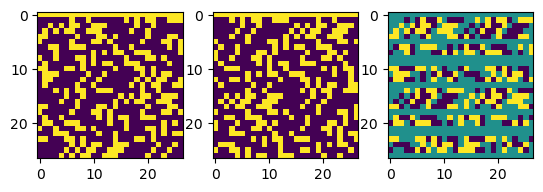

In [76]:
k = 10
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
ax1.imshow(np.real(mubs[27*k:27*(k+1)]))
ax2.imshow(np.real(mubs_kantor[27*k:27*(k+1)]))
ax3.imshow(np.real(mubs[27*k:27*(k+1)] - mubs_kantor[27*k:27*(k+1)]))

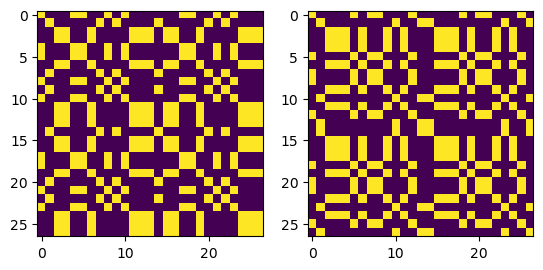

In [113]:
k = 10
j = 0
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(np.real(proj(mubs[27*k:27*(k+1), j])))
ax2.imshow(np.real(proj(mubs_kantor[27*k:27*(k+1), j])))

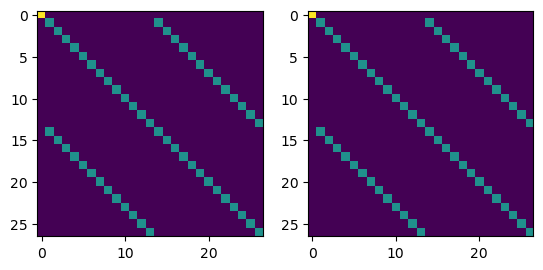

In [104]:
j = 0
m = 28
Aw = np.zeros((27,27), dtype='complex64')
Ak = np.zeros((27,27), dtype='complex64')
for k in range(m):
    Aw += proj(mubs[27*k:27*(k+1), j])
    Ak += proj(mubs_kantor[27*k:27*(k+1), j])

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(np.real(Aw))
ax2.imshow(np.real(Ak))

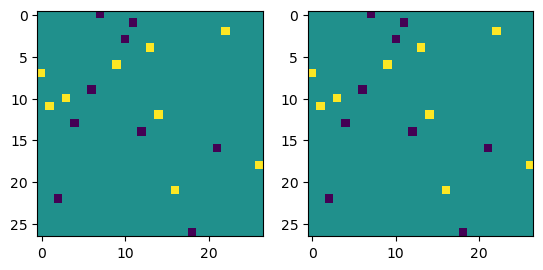

In [114]:
p = (F[20], F[15])
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(np.imag(wootters.A(*p)))
ax2.imshow(np.imag(kantor.A(*p)))